# **RONALDO vs MESSI - WHO IS THE REAL CHAMPION?**

<img src=https://pbs.twimg.com/media/EoRIiXcWMAAcS22.jpg width="400">

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/verticale3185/FINEL-PROJECT/main/cristiano_vs_messi.csv')
df

,player,comp,round,date,venue,opp,pos,min,type,assisted
0,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,RW,34',NaN,NaN
1,ronaldo,Liga NOS,6,10/7/2002,H,Moreirense,NaN,90',NaN,NaN
2,ronaldo,Liga NOS,8,10/26/2002,A,Boavista,NaN,88',NaN,Carlos Martins
3,ronaldo,Taça de Portugal Placard,Fourth Round,11/24/2002,H,Estarreja,NaN,67',Left-footed shot,César Prates
4,ronaldo,Taça de Portugal Placard,Fifth Round,12/18/2002,H,Oliv. Hospital,NaN,13',NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1295,messi,NaN,NaN,NaN,NaN,NaN,NaN,82',Left-footed shot,Sergi Roberto
1296,messi,LaLiga,11,11/29/2020,H,CA Osasuna,RW,73',Left-footed shot,Trincão
1297,messi,LaLiga,13,12/13/2020,H,Levante,CF,76',Left-footed shot,Frenkie de Jong
1298,messi,LaLiga,14,12/19/2020,H,Valencia,CF,45'+4,Header,NaN


# Data explanation:  
  
This dataset summarizes goals scored by Messi and Ronaldo of all their careers.
Every row is one goal.
There is 1300 rows and 10 columns:

## Columns:
**Player** = Ronaldo / Messi.  
**Comp** = competition.  
**Round** = the round of the match in the competition.  
**Date** = date of the match.  
**Venue** = home / away.  
**Opp** = the opposing team.  
**Pos** = possion of the plater on the field.  
**Min** = a minute of match.  
**Type** = type of the goal.  
**Assisted** = the name of the team player that assisted to the player (there non-assisted goals - solo)

# Handling missing data:

In the dataset, every empty raw is because there was more than one goal in the same match.  
So, we fill all the mising data in the relevent data by "ffill".

In [2]:
columns =['comp', 'round', 'date', 'venue', 'opp', 'pos']
for x in columns:
    df[x]=df[x].fillna(method='ffill')

1. **assisted column:**  
Every NaN meaning to non assisted goal - solo attack.  
So we replaced all NaN with "solo".  

2. **date column:**  
We changed the type to dateime type and made new "year" column.  

3. **min column:**  
We changed the type to integer and cleaned signs like ' and +.  

4. **pos column:**  
Cleaned not necessary signs.
  
5. we created seperate charts for each player.

In [3]:
df.assisted = df.assisted.fillna('Solo')
df.date = pd.to_datetime(df.date)
df['year'] = pd.DatetimeIndex(df['date']).year
df['year'].fillna(method = 'ffill', inplace = True)
df['year'] = df['year'].astype(int)

df['min'] = df['min'].astype(str)
df['min'] = df['min'].str.replace("'", "")
new_time = df['min'].str.extract('(\d+)[+](\d+)',expand=True).dropna().astype(int).sum(axis=1)
df.loc[new_time.index,'min'] = new_time
df['min'] = df['min'].astype(int)

if len(df.pos) > 2:
    df.pos = df.pos.str[0:2]

df['player'] = df['player'].str.title()

In [4]:
messi_df = df.loc[df.player == 'Messi'].reset_index()
ronaldo_df = df.loc[df.player == 'Ronaldo']

<img src=https://bolavip.com/__export/1598657320847/sites/bolavip/img/2020/08/28/lionel_messi_vs_cristiano_ronaldo.jpg_1546398727.jpg width="600">

## Who Scored More Goals Per Year?

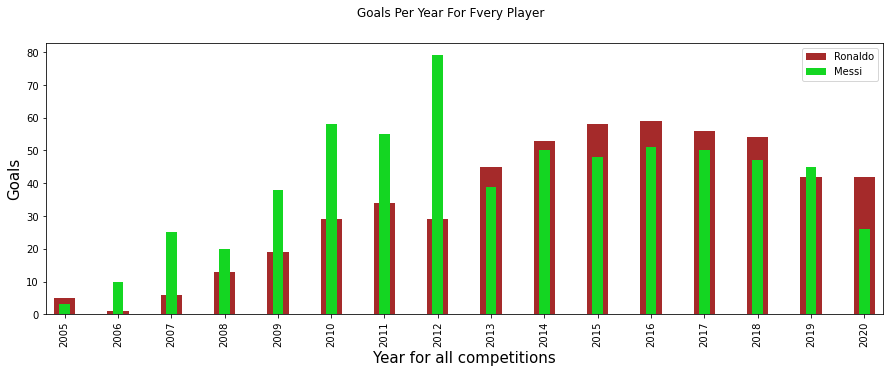

In [5]:
plt.suptitle('Goals Per Year For Fvery Player')
ronaldo_df.groupby(['year'])['player'].count().astype(int).plot(kind='bar',color='brown',label='Ronaldo',figsize=(15,5),width = 0.4)
messi_df.groupby(['year'])['player'].count().astype(int).plot(kind='bar',color='#14D622',label='Messi',figsize=(15,5),width = 0.2)
plt.legend()
plt.ylabel('Goals' , fontsize = 15)
plt.xlabel('Year for all competitions', fontsize = 15)
plt.show()

### From this comparison we can understand:  
1. 2012 was a dramatic year in Messi and Ronaldo's career, it was the best year for Messi career's and the worst year for Ronaldo career's.  
2. Until 2012 Messi scored more goals than Ronaldo, and from 2013 Ronaldo scores more goals.  
3. Ronaldo is more stable than Messi across the years.
4. Ronaldo and Messi have passed their record and are scoring less goals than before.

## Who Scored More Goals Per Type?

## Who Scored More Goals Per Possition?

In [6]:
df.groupby(['player','pos'])[['pos']].count()

pos
player  pos     
Messi   AM    10
        CF   272
        LW     1
        RW   316
        SS    45
Ronaldo CF   165
        LW   367
        RW   124

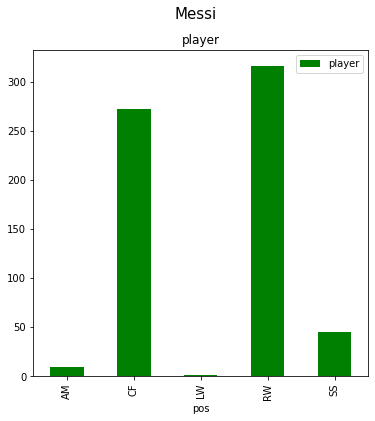

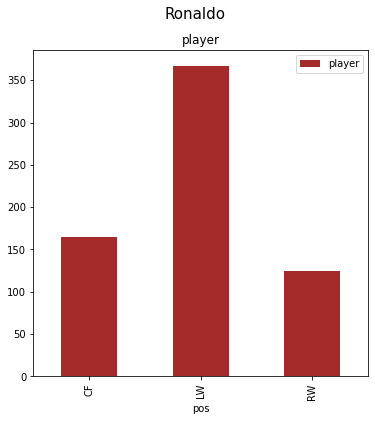

In [25]:
messi_df.groupby(['pos'])[['player']].count().plot(kind='bar', subplots=True,figsize=(6, 6), title = "Messi", color = "green")
plt.suptitle("Messi", fontsize = 15)

ronaldo_df.groupby(['pos'])[['player']].count().plot(kind='bar', subplots=True, figsize=(6,6), title = "Ronaldo", color = "brown")
plt.suptitle("Ronaldo", fontsize = 15)
plt.show()

### From this comparison we can understand:  
1. The best position for Ronaldo is LW and for Messi is RW.
2. Messi better than Ronaldo in CF possition.
3. Ronaldo better than Messi on the "weak side".
4. Messi scored from more possionss than Ronaldo, but in low percentages.

<img src=https://i.insider.com/60801d9644f4540019207e58 width="700">

## Who Was The Best Scorer In "LaLiga" (the spanish league)?

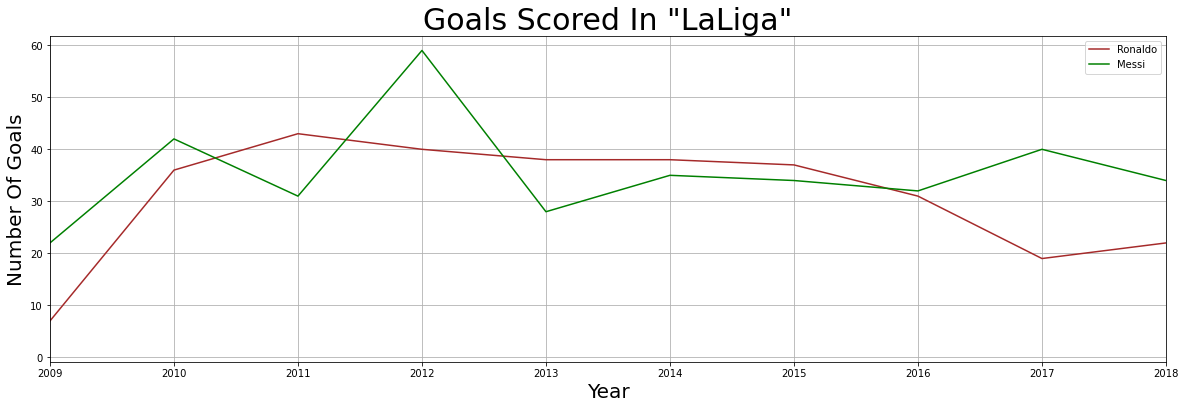

In [8]:
plt.plot()
r = ronaldo_df.loc[ronaldo_df.comp=='LaLiga'].groupby(['year'])['player'].count().plot(kind='line',color = 'brown',label='Ronaldo',figsize=(20,8))
m = messi_df.loc[(messi_df.comp=='LaLiga')].groupby(['year'])['player'].count().plot(kind='line',color = 'green',label='Messi',figsize=(20,6))
plt.title('Goals Scored In "LaLiga"', fontsize = 30)
plt.ylabel('Number Of Goals', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xlim(2009,2018)
plt.legend()
plt.grid(True)
plt.show()

#### Average goals per player per season:

In [9]:
df.loc[df.comp=='LaLiga'].groupby(['player','year'])[['year']].count().groupby(["player"]).mean().style.set_caption("Average goals per player per season")

,year
player,
Messi,28.187500
Ronaldo,31.100000


### From this comparison we can understand:  
1. Ronaldo is more stable than Messi across the years.
2. In the period from 2009 to 2018, Messi was  the best scorer for 6 seasons (2009, 2010, 2012, 2016, 2017, 2018) compared to only 4 seasons for Ronaldo (2011, 2013, 2014, 2015).
3. Ronaldo scores an average of 2 goals more than Messi per year

## Who Is The Best Scorer In The Money Time?

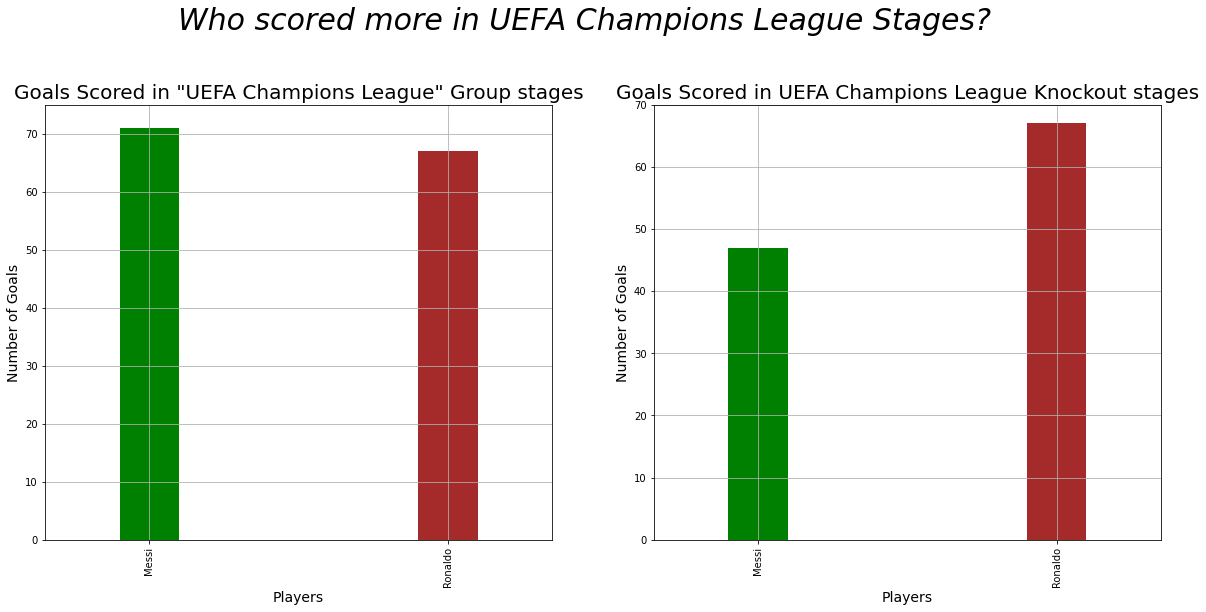

In [10]:
plt.subplot(1,2,1)
df.loc[(df['comp']=='Champions League') & (df['round'] == 'Group Stage')].groupby(['player'])['date'].count().plot(kind='bar',width = 0.2, color = ( "green","brown"))
plt.title('Goals Scored in "UEFA Champions League" Group stages',fontsize = 20)
plt.xlabel('Players',fontsize = 14)
plt.ylabel('Number of Goals',fontsize = 14)
plt.ylim(0,75)
plt.grid(True)

plt.subplot(1,2,2)
df.loc[(df['comp']=='Champions League') & (df['round'] != 'Group Stage')].groupby(['player'])['date'].count().plot(kind='bar',figsize=(20,8),width = 0.2, color = ( "green","brown"))
plt.title('Goals Scored in UEFA Champions League Knockout stages',fontsize=20)
plt.xlabel('Players',fontsize = 14)
plt.ylabel('Number of Goals',fontsize = 14)
plt.ylim(0,70)
plt.suptitle('Who scored more in UEFA Champions League Stages?',fontsize=30,style ='italic',y=1.05)
plt.grid(True)
plt.show()


#### Goals Scored in UEFA Champions League Knockout stages:

In [11]:
df.loc[(df['comp']=='Champions League') & (df['round'] == 'Group Stage')].groupby(['player','comp'])[['date']].count()

,,date
player,comp,
Messi,Champions League,71
Ronaldo,Champions League,67


#### Goals Scored in "UEFA Champions League" Group stages:

In [23]:
df.loc[(df['comp']=='Champions League') & (df['round'] != 'Group Stage')].groupby(['player','comp'])[['date']].count()

,,date
player,comp,
Messi,Champions League,47
Ronaldo,Champions League,67


### From this comparison we can understand:  
1. 

<img src=https://ss.thgim.com/photos/article30894670.ece/alternates/FREE_690/Getty-Images-Messi-Ronaldo width="700">

,ronaldo,messi
Solo,225,201
assisted,1075,1099


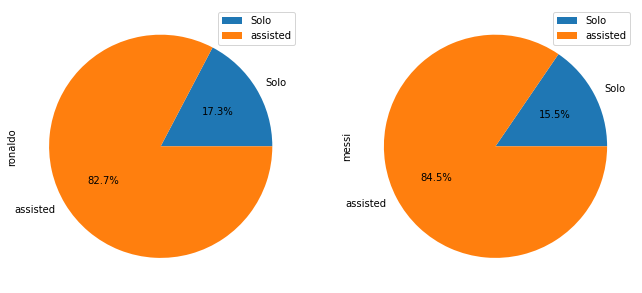

In [13]:
df['Solo_messi'] = ((df['assisted'] == 'Solo') & (df['player'] == 'Messi'))
df['Solo_ronaldo']= ((df['assisted'] == 'Solo') & (df['player'] == 'Ronaldo'))

Solo_ronaldo = (df['Solo_ronaldo'] == True).sum()
Solo_messi = (df['Solo_messi'] == True).sum()
nonSolo_messi = (len(df['Solo_messi']) - Solo_messi)
nonSolo_ronaldo = (len(df['Solo_ronaldo']) - Solo_ronaldo) 

df_pie = pd.DataFrame({'ronaldo' : [Solo_ronaldo , nonSolo_ronaldo],
                      'messi' : [Solo_messi , nonSolo_messi]},
                  index = ['Solo'  , 'assisted'])
plot =df_pie.plot.pie(subplots=True, figsize=(11, 6) , autopct='%1.1f%%')
df_pie

,Messi,Ronaldo
Chest,1.0,NaN
Counter attack goal,NaN,3.0
Deflected shot on goal,2.0,2.0
Direct free kick,47.0,46.0
Header,23.0,103.0
Left-footed shot,394.0,102.0
Long distance kick,NaN,9.0
Penalty,80.0,122.0
Penalty rebound,3.0,2.0
Right-footed shot,80.0,235.0


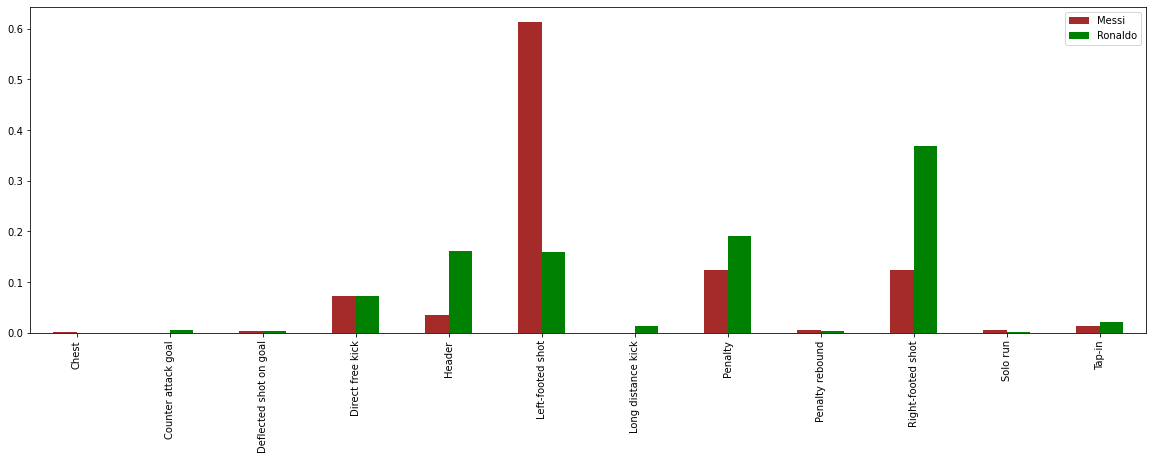

In [20]:
messi_type = df[df['player'] == 'Messi'].type.value_counts()
ronaldo_type = df[df['player'] == 'Ronaldo'].type.value_counts()
df_types = pd.DataFrame({ 'Messi' : messi_type ,
                         'Ronaldo' : ronaldo_type})
_ = (df_types/df_types.sum()).plot.bar(figsize=(20, 6), color = ("brown", "green"))

df_types